# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic/train.p"
validation_file="./traffic/valid.p"
testing_file = "./traffic/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [26]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

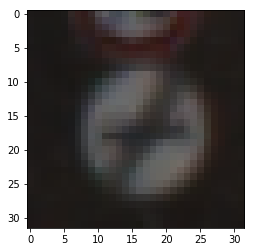

In [4]:
plt.imshow(X_train[0])

0


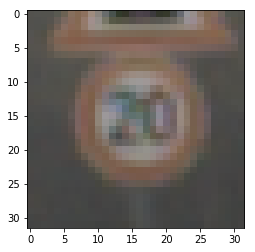

In [5]:
print(y_train[10055])
plt.imshow(X_train[10055])

5


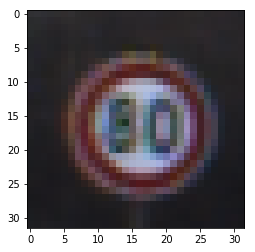

In [6]:
print(y_train[12555])
plt.imshow(X_train[12555])

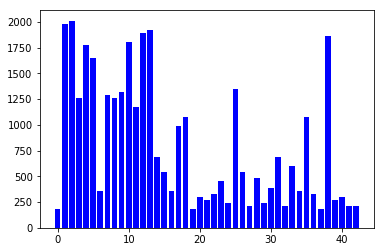

In [7]:
from collections import Counter
yv = Counter(y_train).values()
fig, ax = plt.subplots()
ax.bar(np.arange(n_classes), yv, .8, color='b')
plt.show()

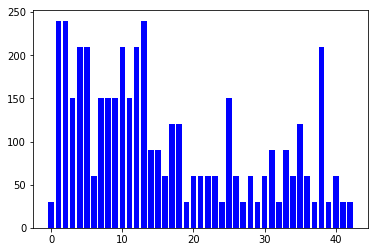

In [8]:
fig, ax = plt.subplots()
ax.bar(np.arange(n_classes), Counter(y_valid).values(), .8, color='b')
plt.show()

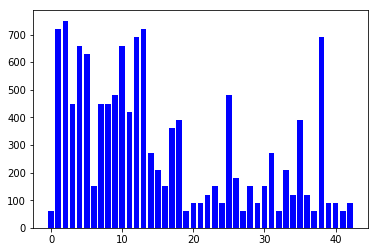

In [9]:
fig, ax = plt.subplots()
ax.bar(np.arange(n_classes), Counter(y_test).values(), .8, color='b')
plt.show()

## Observations
* Class balance is similar in all three sets, dont see much of skew versus test / valid set. 
* There is class imbalance in the dataset, about 30% of classes are having more than 60% of images.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

* As part of pre-processing converting images to gray scale as not much of information is embeded in color. Shape primarily determines sign.

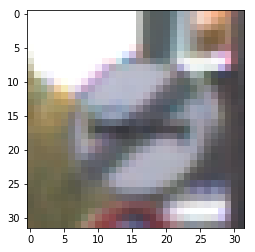

In [5]:
plt.imshow(X_train[104])

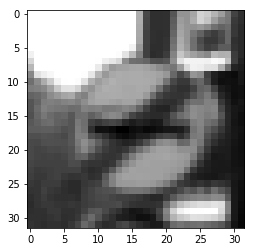

In [27]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
plt.imshow(cv2.cvtColor(X_train[104], cv2.COLOR_RGB2GRAY), cmap='gray')

In [28]:
def normalize(x):
    return (x-128.0)/128
gX_train = [normalize(cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)) for x in X_train]
gX_valid = [normalize(cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)) for x in X_valid]
gX_test = [normalize(cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)) for x in X_test]

In [29]:
import tensorflow as tf
from sklearn.utils import shuffle
import numpy as np

### Model Architecture

In [38]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
conv1_W = 1
conv2_W = 1
fc1_W = 1
fc2_W = 1
fc3_W = 1
fc1, fc2, fc3 = (1,1,1)
def NNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    global conv1_W, conv2_W, fc1_W, fc2_W,fc3_W, fc1, fc2, fc3
    global conv1, conv2, fc1, fc2, fc3
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="c")
    conv1_b = tf.Variable(tf.zeros(6), name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="conv2_W")
    conv2_b = tf.Variable(tf.zeros(16), name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    layer4_size = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, layer4_size), mean = mu, stddev = sigma), name="fc1_W")
    fc1_b = tf.Variable(tf.zeros(layer4_size), name="fc1_b")
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    layer5_size = 84
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(layer4_size, layer5_size), mean = mu, stddev = sigma), name="fc2_W")
    fc2_b  = tf.Variable(tf.zeros(layer5_size), name="fc2_b")
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    layer6_size = 21
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(layer5_size, layer6_size), mean = mu, stddev = sigma), name="fc3_W")
    fc3_b  = tf.Variable(tf.zeros(layer6_size), name="fc3_b")
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    fc3    = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(layer6_size, n_classes), mean = mu, stddev = sigma), name="fc4_W")
    fc4_b  = tf.Variable(tf.zeros(n_classes), name="fc4_b")
    logits = tf.matmul(fc3, fc4_W) + fc4_b

    
    return logits
keep_prob = tf.placeholder(tf.float32) 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = NNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [39]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [40]:
EPOCHS=15
BATCH_SIZE=128
def doit(sess, X_train, y_train):
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: np.array(batch_x).reshape((len(batch_x), 32,32,1)), y: batch_y, keep_prob:.6})


            validation_accuracy = evaluate(sess, np.array(gX_valid).reshape((len(gX_valid),32,32,1)), y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")
        


### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [41]:
def continue_n(sess, X_train, y_train, EPOCHS, keep=.6):
        num_examples = len(X_train)
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: np.array(batch_x).reshape((len(batch_x), 32,32,1)), y: batch_y, keep_prob:keep})
            
            validation_accuracy = evaluate(sess, np.array(gX_valid).reshape((len(gX_valid),32,32,1)), y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

In [34]:
sess =  tf.Session()

In [18]:
sess

In [27]:
%time doit(sess, gX_train, y_train)

Training...

EPOCH 1 ...
Validation Accuracy = 0.412

EPOCH 2 ...
Validation Accuracy = 0.621

EPOCH 3 ...
Validation Accuracy = 0.690

EPOCH 4 ...
Validation Accuracy = 0.762

EPOCH 5 ...
Validation Accuracy = 0.795

EPOCH 6 ...
Validation Accuracy = 0.805

EPOCH 7 ...
Validation Accuracy = 0.844

EPOCH 8 ...
Validation Accuracy = 0.843

EPOCH 9 ...
Validation Accuracy = 0.837

EPOCH 10 ...
Validation Accuracy = 0.860

EPOCH 11 ...
Validation Accuracy = 0.860

EPOCH 12 ...
Validation Accuracy = 0.862

EPOCH 13 ...
Validation Accuracy = 0.875

EPOCH 14 ...
Validation Accuracy = 0.887

EPOCH 15 ...
Validation Accuracy = 0.881

Model saved
CPU times: user 8min 56s, sys: 2min 18s, total: 11min 15s
Wall time: 6min 41s


In [28]:
%time continue_n(sess, gX_train, y_train, 5)

Training...

EPOCH 1 ...
Validation Accuracy = 0.878

EPOCH 2 ...
Validation Accuracy = 0.884

EPOCH 3 ...
Validation Accuracy = 0.895

EPOCH 4 ...
Validation Accuracy = 0.899

EPOCH 5 ...
Validation Accuracy = 0.892

CPU times: user 2min 47s, sys: 43.1 s, total: 3min 30s
Wall time: 2min 3s


In [29]:
saver.save(sess, './lenet1')

'./lenet1'

In [30]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet2')

Training...

EPOCH 1 ...
Validation Accuracy = 0.901

EPOCH 2 ...
Validation Accuracy = 0.896

EPOCH 3 ...
Validation Accuracy = 0.906

EPOCH 4 ...
Validation Accuracy = 0.899

EPOCH 5 ...
Validation Accuracy = 0.908

EPOCH 6 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.918

EPOCH 8 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.918

EPOCH 14 ...
Validation Accuracy = 0.915

EPOCH 15 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.933

EPOCH 19 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.924

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 22 ...
Validation Accuracy = 0.921

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 24 ...
Validation Accura

'./lenet2'

In [31]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet3')

Training...

EPOCH 1 ...
Validation Accuracy = 0.926

EPOCH 2 ...
Validation Accuracy = 0.937

EPOCH 3 ...
Validation Accuracy = 0.932

EPOCH 4 ...
Validation Accuracy = 0.938

EPOCH 5 ...
Validation Accuracy = 0.939

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.937

EPOCH 9 ...
Validation Accuracy = 0.936

EPOCH 10 ...
Validation Accuracy = 0.939

EPOCH 11 ...
Validation Accuracy = 0.935

EPOCH 12 ...
Validation Accuracy = 0.941

EPOCH 13 ...
Validation Accuracy = 0.943

EPOCH 14 ...
Validation Accuracy = 0.935

EPOCH 15 ...
Validation Accuracy = 0.948

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.943

EPOCH 18 ...
Validation Accuracy = 0.934

EPOCH 19 ...
Validation Accuracy = 0.942

EPOCH 20 ...
Validation Accuracy = 0.943

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 22 ...
Validation Accuracy = 0.941

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 24 ...
Validation Accura

'./lenet3'

In [32]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet4')

Training...

EPOCH 1 ...
Validation Accuracy = 0.937

EPOCH 2 ...
Validation Accuracy = 0.942

EPOCH 3 ...
Validation Accuracy = 0.941

EPOCH 4 ...
Validation Accuracy = 0.937

EPOCH 5 ...
Validation Accuracy = 0.939

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.942

EPOCH 9 ...
Validation Accuracy = 0.944

EPOCH 10 ...
Validation Accuracy = 0.949

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.942

EPOCH 13 ...
Validation Accuracy = 0.945

EPOCH 14 ...
Validation Accuracy = 0.944

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.944

EPOCH 20 ...
Validation Accuracy = 0.946

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.951

EPOCH 24 ...
Validation Accura

'./lenet4'

In [33]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet5')

Training...

EPOCH 1 ...
Validation Accuracy = 0.953

EPOCH 2 ...
Validation Accuracy = 0.949

EPOCH 3 ...
Validation Accuracy = 0.949

EPOCH 4 ...
Validation Accuracy = 0.944

EPOCH 5 ...
Validation Accuracy = 0.939

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.944

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.942

EPOCH 13 ...
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Accuracy = 0.951

EPOCH 15 ...
Validation Accuracy = 0.946

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.957

EPOCH 18 ...
Validation Accuracy = 0.945

EPOCH 19 ...
Validation Accuracy = 0.952

EPOCH 20 ...
Validation Accuracy = 0.951

EPOCH 21 ...
Validation Accuracy = 0.955

EPOCH 22 ...
Validation Accuracy = 0.949

EPOCH 23 ...
Validation Accuracy = 0.945

EPOCH 24 ...
Validation Accura

'./lenet5'

In [34]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet6')

Training...

EPOCH 1 ...
Validation Accuracy = 0.952

EPOCH 2 ...
Validation Accuracy = 0.951

EPOCH 3 ...
Validation Accuracy = 0.946

EPOCH 4 ...
Validation Accuracy = 0.947

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.948

EPOCH 8 ...
Validation Accuracy = 0.941

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.948

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.940

EPOCH 15 ...
Validation Accuracy = 0.938

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.953

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.948

EPOCH 20 ...
Validation Accuracy = 0.943

EPOCH 21 ...
Validation Accuracy = 0.958

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 24 ...
Validation Accura

'./lenet6'

In [35]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet7')

Training...

EPOCH 1 ...
Validation Accuracy = 0.947

EPOCH 2 ...
Validation Accuracy = 0.955

EPOCH 3 ...
Validation Accuracy = 0.963

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.945

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.948

EPOCH 9 ...
Validation Accuracy = 0.947

EPOCH 10 ...
Validation Accuracy = 0.952

EPOCH 11 ...
Validation Accuracy = 0.945

EPOCH 12 ...
Validation Accuracy = 0.955

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.954

EPOCH 16 ...
Validation Accuracy = 0.943

EPOCH 17 ...
Validation Accuracy = 0.956

EPOCH 18 ...
Validation Accuracy = 0.958

EPOCH 19 ...
Validation Accuracy = 0.956

EPOCH 20 ...
Validation Accuracy = 0.951

EPOCH 21 ...
Validation Accuracy = 0.949

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.955

EPOCH 24 ...
Validation Accura

'./lenet7'

In [36]:
%time continue_n(sess, gX_train, y_train, 25)
saver.save(sess, './lenet8')

Training...

EPOCH 1 ...
Validation Accuracy = 0.954

EPOCH 2 ...
Validation Accuracy = 0.955

EPOCH 3 ...
Validation Accuracy = 0.956

EPOCH 4 ...
Validation Accuracy = 0.957

EPOCH 5 ...
Validation Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.956

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.945

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.943

EPOCH 11 ...
Validation Accuracy = 0.939

EPOCH 12 ...
Validation Accuracy = 0.948

EPOCH 13 ...
Validation Accuracy = 0.951

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.946

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.937

EPOCH 19 ...
Validation Accuracy = 0.954

EPOCH 20 ...
Validation Accuracy = 0.956

EPOCH 21 ...
Validation Accuracy = 0.947

EPOCH 22 ...
Validation Accuracy = 0.957

EPOCH 23 ...
Validation Accuracy = 0.939

EPOCH 24 ...
Validation Accura

'./lenet8'

In [38]:
%time continue_n(sess, gX_train, y_train, 25, .7)
saver.save(sess, './lenet9')

Training...

EPOCH 1 ...
Validation Accuracy = 0.957

EPOCH 2 ...
Validation Accuracy = 0.955

EPOCH 3 ...
Validation Accuracy = 0.957

EPOCH 4 ...
Validation Accuracy = 0.959

EPOCH 5 ...
Validation Accuracy = 0.953

EPOCH 6 ...
Validation Accuracy = 0.960

EPOCH 7 ...
Validation Accuracy = 0.960

EPOCH 8 ...
Validation Accuracy = 0.948

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.950

EPOCH 11 ...
Validation Accuracy = 0.952

EPOCH 12 ...
Validation Accuracy = 0.955

EPOCH 13 ...
Validation Accuracy = 0.963

EPOCH 14 ...
Validation Accuracy = 0.961

EPOCH 15 ...
Validation Accuracy = 0.958

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.958

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.954

EPOCH 20 ...
Validation Accuracy = 0.960

EPOCH 21 ...
Validation Accuracy = 0.951

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.954

EPOCH 24 ...
Validation Accura

'./lenet9'






### Load and Output the Images

In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import listdir
files = listdir("data")
import matplotlib.image as mpimg
#im = mpimg.imread("data/" + files[0])

gX_data = [normalize(cv2.cvtColor(mpimg.imread("data/" + f), cv2.COLOR_RGB2GRAY)) for f in files if f.endswith("jpg")]
#gX_data = [cv2.cvtColor(mpimg.imread("data/" + x), cv2.COLOR_RGB2GRAY) for x in files]

In [37]:
tf.reset_default_graph()
sess =  tf.Session() # as sess:

Run network cnfiguration above before loading the tf graph (net)

In [42]:
saver.restore(sess, save_path="./lenet9")

In [43]:
pred = tf.argmax(logits, 1)

# with tf.Session() as sess:

t=sess.run(pred, feed_dict={x:np.array(gX_data).reshape((len(gX_data),32,32,1)), keep_prob: 1.0})
predicted_probability=sess.run(tf.nn.softmax(logits), feed_dict={x:np.array(gX_data).reshape((len(gX_data),32,32,1)), keep_prob:1.0})
print(t)

[33 25 22 28 17]


In [41]:
print (predicted_probability)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   4.01018606e-35
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   2.05487503e-08   1.09565139e-19   0.00000000e+00
    1.11812593e-09   1.47966356e-13   6.96519809e-15   9.48814995e-05
    7.70626472e-32   8.23715663e-21   0.00000000e+00   0.00000000e+00
    2.15812111e-30   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.41349869e-26   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.22462830e-22   9.99905109e-01   7.10491790e-34   9.64571652e-12
    0.00000000e+00   4.63660280e-22   7.46908640e-31   1.34510438e-29
    2.53127505e-37   4.16043440e-19   2.17528202e-28]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00 

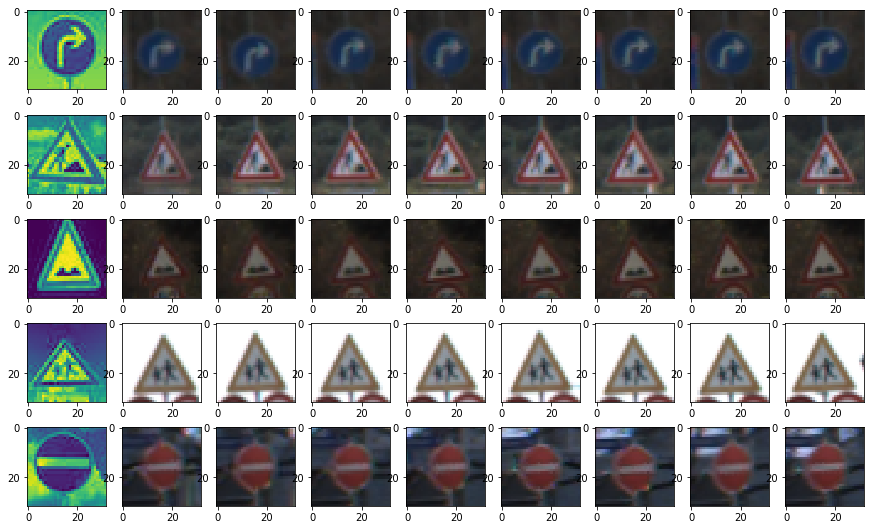

In [22]:
plt.figure(1, figsize=(15,15))
c=1
for i in range(len(t)):
    predicted_class=t[i]
    imgx = X_train[y_train == predicted_class]
    plt.subplot(8,9, c)
    c+=1
    plt.imshow(gX_data[i]*128+128) 
    for i in range(min(len(imgx), 8)):
        plt.subplot(8,9, c)
        c+=1
        plt.imshow(imgx[i])

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [131]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = 5/5*100
print("Accuracy %0.02f %%"%accuracy)

Accuracy 100.00 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

## Prediction confidence

In [52]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#print( predicted_probability)
#with tf.Session() as sess:
#saver.restore(sess, save_path="./lenet")
topk = sess.run(tf.nn.top_k(tf.constant(predicted_probability), k=3))
print(topk)

TopKV2(values=array([[  9.98965025e-01,   5.59943554e-04,   3.23146494e-04],
       [  9.99978662e-01,   1.77250258e-05,   2.41048497e-06],
       [  6.29099727e-01,   3.59903783e-01,   4.99028014e-03],
       [  9.93905008e-01,   3.19674774e-03,   2.81720795e-03],
       [  9.93668258e-01,   6.08480535e-03,   1.92529333e-04],
       [  9.14174914e-01,   8.12469646e-02,   3.85195366e-03],
       [  8.35541666e-01,   9.49035063e-02,   2.37363111e-02]], dtype=float32), indices=array([[33, 39, 35],
       [25, 22, 29],
       [29, 22, 25],
       [28, 29, 24],
       [17, 13, 14],
       [29, 22, 25],
       [29, 31, 22]], dtype=int32))


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [44]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = sess.run(tf_activation, feed_dict={x : image_input})
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    levels = activation.shape[0]
    plt.figure(plt_num, figsize=(15,15))
    img = 0
    for lvl in range(levels):
        for featuremap in range(featuremaps):
            plt.subplot(levels,featuremaps, img+1) # sets the number of feature maps to show on each row and column
            img+=1
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[lvl,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[lvl,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[lvl,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[lvl,:,:, featuremap], interpolation="nearest", cmap="gray")

Tensor("c/read:0", shape=(5, 5, 1, 6), dtype=float32)


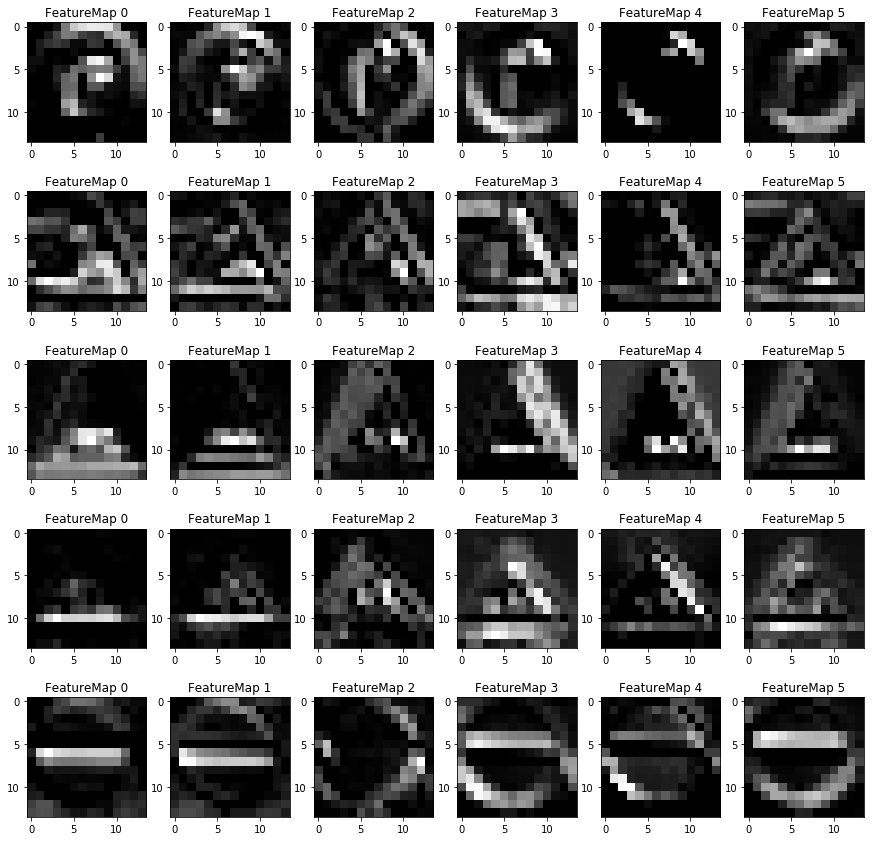

In [46]:
inp = np.array(gX_data).reshape((len(gX_data),32,32,1))
print(conv1_W)
print (sess)
outputFeatureMap(sess, inp, conv1)

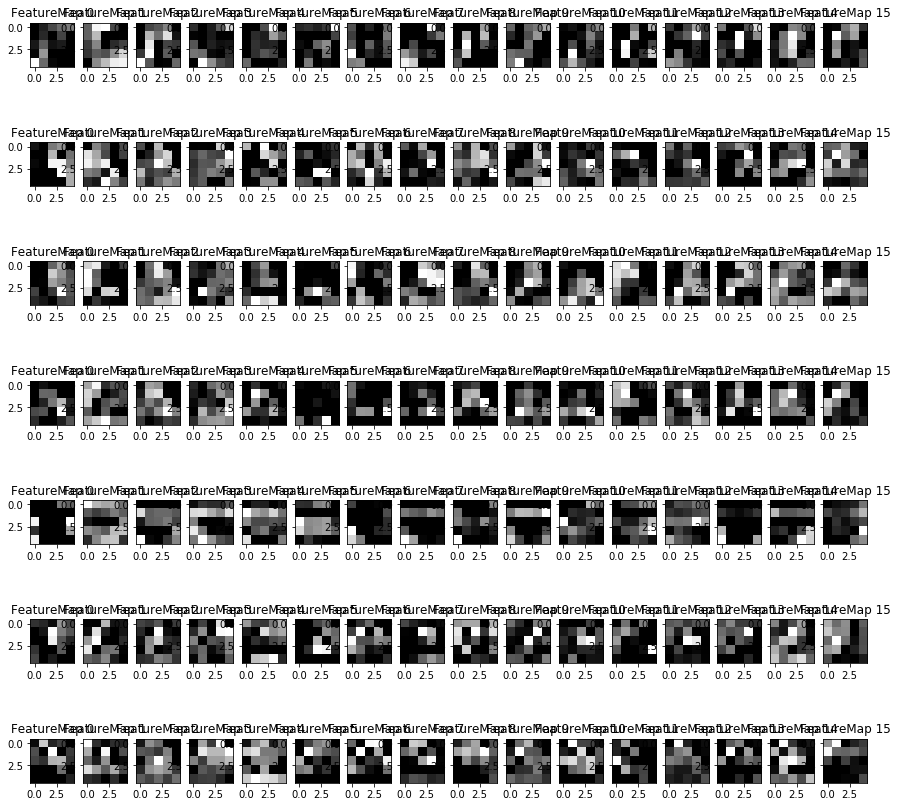

In [123]:
outputFeatureMap(sess, inp, conv2)

In [113]:
activation = sess.run(conv1,  feed_dict={x : inp})

In [115]:
featuremap=0
activation.shape

(7, 14, 14, 6)

## Final accuracy on test set

In [20]:
evaluate(sess, np.array(gX_test).reshape((len(gX_test),32,32,1)), y_test)

0.93562945353069293

In [21]:
evaluate(sess, np.array(gX_train).reshape((len(gX_train),32,32,1)), y_train)

0.99954021667289294

In [22]:
evaluate(sess, np.array(gX_valid).reshape((len(gX_valid),32,32,1)), y_valid)

0.9557823131954859